In [31]:
# import libraries

import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust the configururation of plots


import numpy as np

In [32]:
#read in and show the data
df = pd.read_csv(r"C:\Users\movie data analysis\movies.csv")
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [33]:
#check and see if there is any missing data using a for loop 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [34]:
#Remove any rows or columns that contain missing or NaN (Not a Number) values.
df.dropna(inplace=True)
#data types of the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

<AxesSubplot:>

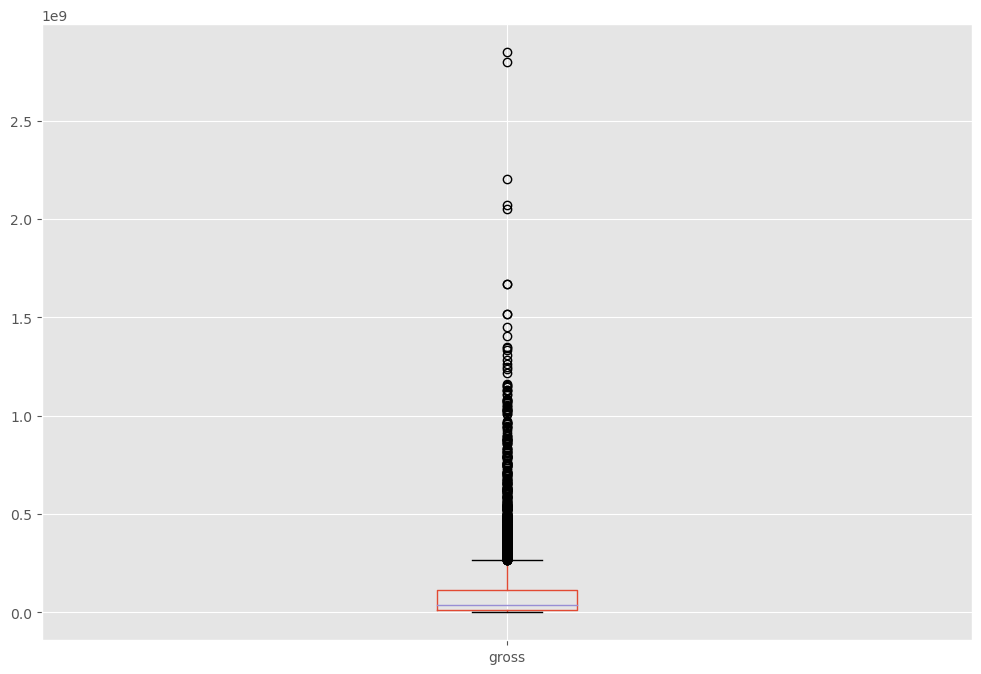

In [35]:
# check for any Outliers

df.boxplot(column=['gross'])

In [36]:
#Data cleaning - change data type of the following columns to integers
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

#Make corrections to the film released year 
#change the 'released' column's datatype to string
df['released'] = df['released'].astype(str)
pattern = r'([A-Za-z]+\s\d{1,2},\s\d{4})'
df['released'] = df['released'].str.extract(pattern)
df['released'] = pd.to_datetime(df['released'], format='%B %d, %Y')
df['released'] = df['released'].astype(str)

#add a column: 'yearcorrect' to reflect the revised year of release of films
df['yearcorrect'] = df['released'].str[:4]


In [37]:
#Removing unnecessary data 
df1 = df.copy()
df1 = df1.drop('released', axis=1)
df1 = df1.drop('year', axis=1)

#rename columns for better presentation
df1 = df1.rename(columns={'yearcorrect': 'released_year'})
df1 = df1.rename(columns={'company': 'production_company'})
df1 = df1.rename(columns={'gross': 'gross_revenue'})

In [38]:
#sort data by gross revenue
df1 = df1.sort_values(by='gross_revenue', inplace = False, ascending = False)
df1.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross_revenue,production_company,runtime,released_year
5445,Avatar,PG-13,Action,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [39]:
#drop any duplicates
df1['production_company'].drop_duplicates().sort_values(ascending=False)
df1['production_company']

#sort the production company according to the number of films they produced 
#in descending order
df1['production_company'].head()

5445    Twentieth Century Fox
7445           Marvel Studios
3045    Twentieth Century Fox
6663                Lucasfilm
7244           Marvel Studios
Name: production_company, dtype: object

**Finding correlations**  
Guesses:
1. high correlation between gross revenue and budget
2. high correlation between gross revenue and production company

<function matplotlib.pyplot.show(close=None, block=None)>

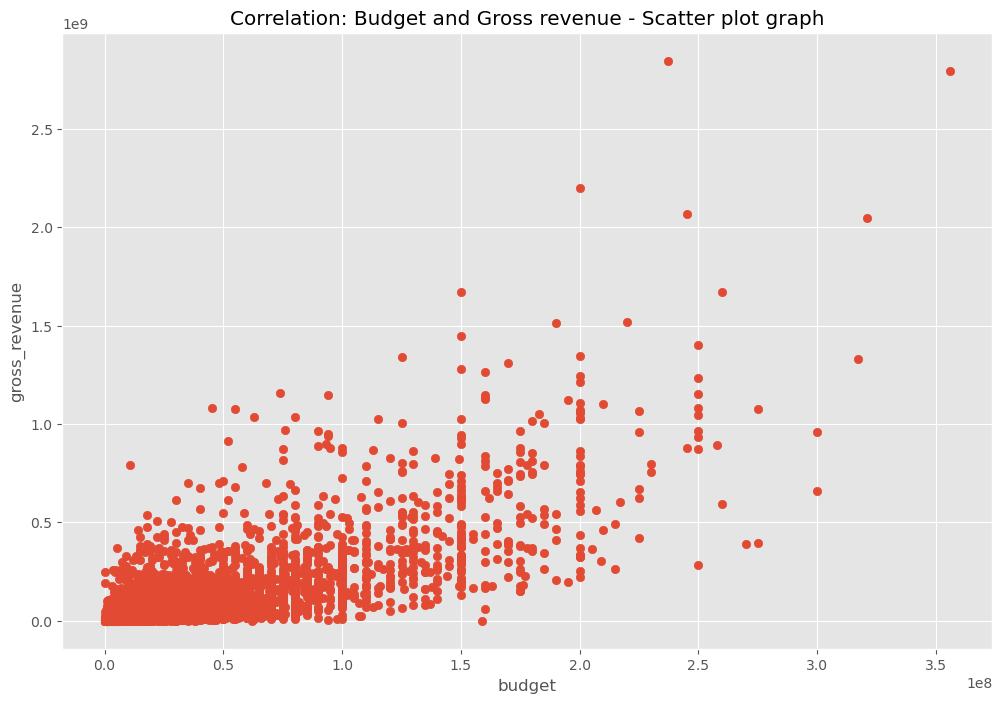

In [40]:
#build a scatter plot to find correlation between budget and gross revenue

plt.scatter(x=df1['budget'], y=df1['gross_revenue'])
plt.title('Correlation: Budget and Gross revenue - Scatter plot graph')
plt.xlabel('budget')
plt.ylabel('gross_revenue')
plt.show


Text(0.5, 1.0, 'Correlation: Budget and Gross revenue - Scatter plot with regression line')

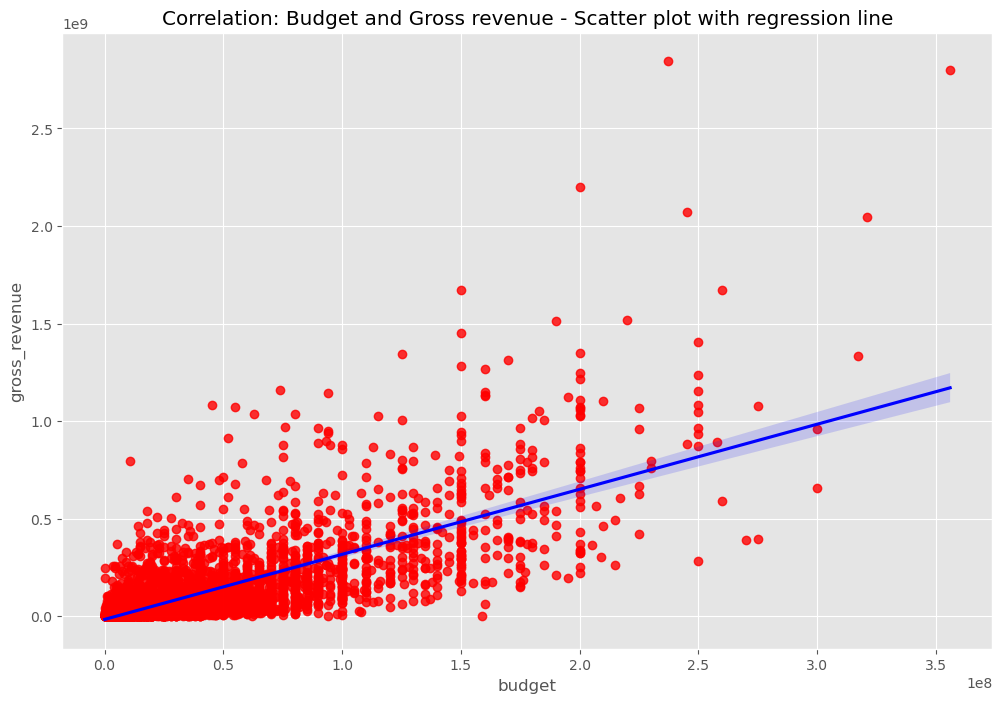

In [41]:
#Use regression to find correlation between budget and gross revenue using seaborn and 
#Visualise the result by plotting a scatter plot with regression line


sns.regplot(x='budget', y='gross_revenue', data =df1, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title('Correlation: Budget and Gross revenue - Scatter plot with regression line')


**Finding correlation using different correlation methods: #pearson, #kendall, #spearman**

In [43]:
df1.corr() 

,score,votes,budget,gross_revenue,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross_revenue,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


In [44]:
df1.corr(method ="pearson" ) 

,score,votes,budget,gross_revenue,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross_revenue,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


In [45]:
df1.corr(method ="spearman" ) 

,score,votes,budget,gross_revenue,runtime
score,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.495409,1.000000,0.493461,0.745793,0.300621
budget,-0.009971,0.493461,1.000000,0.692958,0.330794
gross_revenue,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.412155,0.300621,0.330794,0.257400,1.000000


In [46]:
df1.corr(method ="kendall" ) 

,score,votes,budget,gross_revenue,runtime
score,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.350185,1.000000,0.346274,0.553625,0.205344
budget,-0.006406,0.346274,1.000000,0.512057,0.231278
gross_revenue,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.292254,0.205344,0.231278,0.176979,1.000000


**Findings:** 
High correlation between budget and gross revenue (Pearson: 0.740247, spearman:0.692958, kendall: 0.512057)

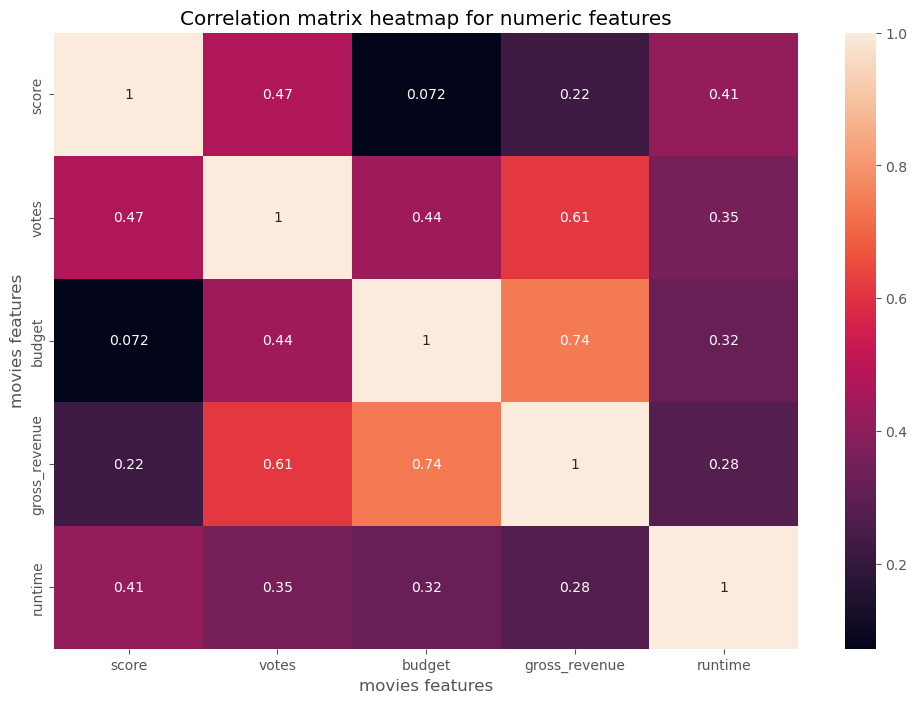

In [47]:
#Make correlation matrix heatmap for numeric features
corr_matrix = df1.corr(method ="pearson" ) 
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation matrix heatmap for numeric features')
plt.xlabel('movies features')
plt.ylabel('movies features')

plt.show()

In [48]:
#Numerise the results for further analysis
df_numerized = df1.copy()

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross_revenue,production_company,runtime,released_year
5445,386,5,0,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,29
7445,388,5,0,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,39
3045,4909,5,6,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,17
6663,3643,5,0,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,35
7244,389,5,0,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,38


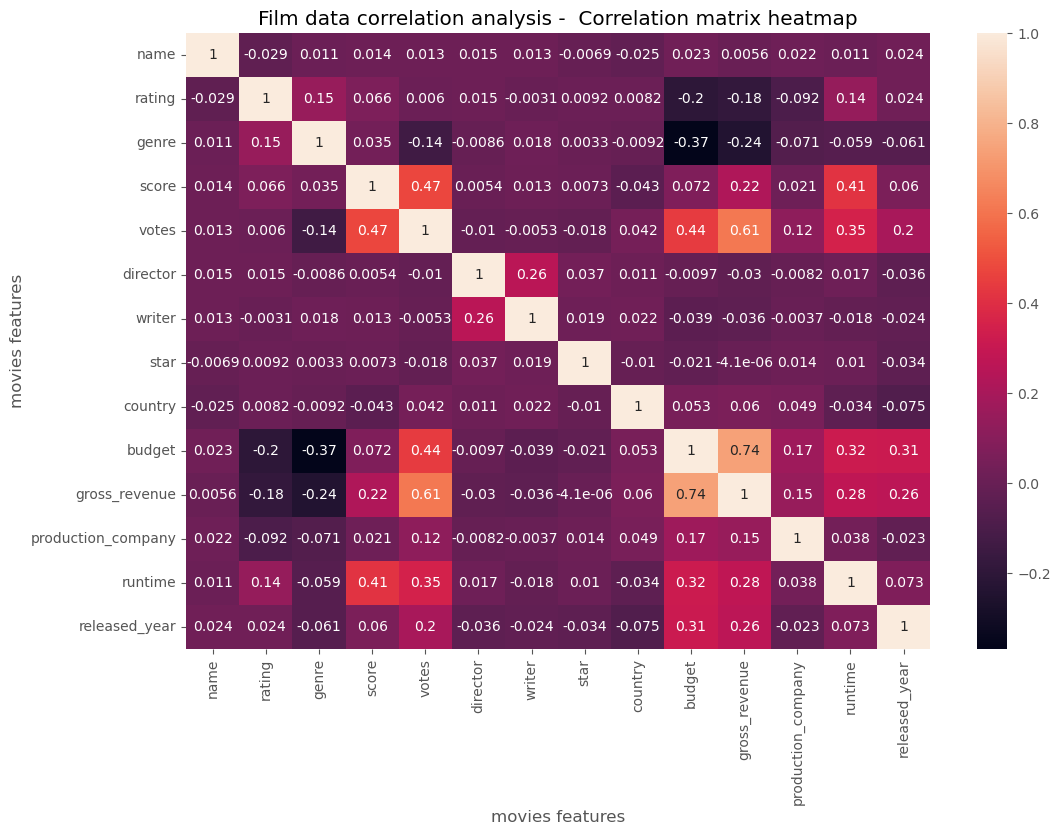

In [49]:
#Find correlation between all movie features using Pearson correlation method 
#Visualise the result by creating a correlation matrix heatmap 
corr_matrix2 = df_numerized.corr(method ="pearson" ) 
sns.heatmap(corr_matrix2,annot=True)
plt.title('Film data correlation analysis -  Correlation matrix heatmap')
plt.xlabel('movies features')
plt.ylabel('movies features')

plt.show()

In [50]:
df_numerized.corr().head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross_revenue,production_company,runtime,released_year
name,1.000000,-0.029234,0.010996,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.024136
rating,-0.029234,1.000000,0.147796,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.023929
genre,0.010996,0.147796,1.000000,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.061186
score,0.014450,0.065983,0.035106,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.059718
votes,0.012615,0.006031,-0.135990,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.198517


In [51]:
corr_matrix3 =df_numerized.corr()
corr_pairs = corr_matrix3.unstack()
corr_pairs.head()

name  name      1.000000
      rating   -0.029234
      genre     0.010996
      score     0.014450
      votes     0.012615
dtype: float64

In [52]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre          budget          -0.368523
budget         genre           -0.368523
genre          gross_revenue   -0.244101
gross_revenue  genre           -0.244101
budget         rating          -0.203946
                                  ...   
score          score            1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
Length: 196, dtype: float64

In [53]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]
high_corr

gross_revenue  votes            0.614751
votes          gross_revenue    0.614751
budget         gross_revenue    0.740247
gross_revenue  budget           0.740247
dtype: float64

Findings:  
1. Votes and budgets have the highest correlation to gross earnings.  
2. Production company has low correlation vs gross earnings